### Natural Language Processing
#### Homework 2
##### Atsu Atakpa

#### Question 1
1.	In Python, create a method for scoring the vocabulary size of a text, and normalize the score from 0 to 1. It does not matter what method you use for normalization as long as you explain it in a short paragraph. (Various methods will be discussed in the live session.)

In [1]:
from  nltk import  word_tokenize

from bs4 import BeautifulSoup, SoupStrainer

import re
import requests;
import sys; sys.version

'3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]'

##### Versions of packages used

In [2]:
import nltk; print("NLTK",nltk.__version__)
import bs4; print("Beautiful Soup",bs4.__version__)
import re; print("RE",re.__version__)
import requests; print("Requests",requests.__version__)

NLTK 3.2.5
Beautiful Soup 4.6.0
RE 2.2.1
Requests 2.18.4


In [3]:
url_to_fetch_images = 'http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf)'

In [4]:
def get_text_from_url(url):
    return requests.get(url).text

In [5]:
def get_all_links_from_html(html):
    tags = BeautifulSoup(html, 'html.parser', parse_only=SoupStrainer('a', href=True))
    urls = [str(tag.attrs['href']) for tag in tags]
    return urls

In [6]:
def relevent_link(link):
    if '/ebooks/' in link:
        return True
    return False

In [7]:
def  get_book_ids_from_links (links):
    return [link.split('/ebooks/').pop() for link in links]

In [8]:
def get_book_text_urls_from_ids(ids):
    url_template = 'http://www.gutenberg.org/files/{}/{}.txt'
    # url_template = 'http://www.gutenberg.org/files/{}/{}-h/{}-h.htm'
    return [url_template.format(id, id, id) for id in ids]


In [9]:
#all_texts = [{ 'corpus': 'a bad bunny.'}, { 'corpus': 'one 1 sad day did no wrong on this day'}, { 'corpus': 'the big bad bear died'}]
all_texts = []

def fetch_all_texts():
    if len(all_texts) > 0:
        print(len(all_texts))
        return
    # get all the html from the home page of some site
    home_page_html = get_text_from_url(url_to_fetch_images)
    # get all the links from the html
    all_links_from_home_page = get_all_links_from_html(home_page_html)
    # remove unhelpful links
    relevent_links_from_home_page = list(filter(relevent_link, all_links_from_home_page))

    book_ids = get_book_ids_from_links(relevent_links_from_home_page)
    book_urls = get_book_text_urls_from_ids(book_ids)
    print('found {} books'.format(len(book_urls)))
    book_i = 0
    for url in book_urls:
        print ('fetching book via {}'.format(url), end=' ')
        book_text = get_text_from_url(url)
        print('found text with {} characters'.format(len(book_text)))
        all_texts.append({
            'url': url,
            'corpus': book_text
        })

        book_i += 1
        # provide a number to cap
        if book_i == 200:
            return
        
    
    # append to all_texts a dictionary with the raw text
    return 1
fetch_all_texts()

found 104 books
fetching book via http://www.gutenberg.org/files/7841/7841.txt found text with 68479 characters
fetching book via http://www.gutenberg.org/files/5742/5742.txt found text with 69077 characters
fetching book via http://www.gutenberg.org/files/13539/13539.txt found text with 231140 characters
fetching book via http://www.gutenberg.org/files/7425/7425.txt found text with 238071 characters
fetching book via http://www.gutenberg.org/files/16046/16046.txt found text with 83404 characters
fetching book via http://www.gutenberg.org/files/22420/22420.txt found text with 203822 characters
fetching book via http://www.gutenberg.org/files/23424/23424.txt found text with 78 characters
fetching book via http://www.gutenberg.org/files/18217/18217.txt found text with 140578 characters
fetching book via http://www.gutenberg.org/files/24053/24053.txt found text with 99211 characters
fetching book via http://www.gutenberg.org/files/24644/24644.txt found text with 89469 characters
fetching 

1

In [10]:
def get_words_from_corpus(corpus):
    # use regex to only take in actually alphabetic characters
    corpus = re.sub('[^a-zA-Z\s]', '', corpus)
    # get the lowercase of all letter
    corpus = corpus.lower()
    # vectorize all the words
    return word_tokenize(corpus)

In [11]:
def get_unique_words(words):
    return set(words)

In [12]:
%%time
# Loop through all_texts
# Get the largest text
# Score each item based on largest text
#  - Add text scores to each record of all_texts
def score_vocabulary_size():
    highest_vocab = 0
    
    # get the vocabulary size of each item (and the highest item)
    for text in all_texts:
        corpus = text['corpus']
        words = get_words_from_corpus(corpus)
        unique_words = get_unique_words(words)
        vocabulary_size = len(unique_words)
        text['vocabulary_size'] = vocabulary_size

        if vocabulary_size > highest_vocab:
            highest_vocab = vocabulary_size

    # score each item
    for text in all_texts:
        vocabulary_size = text['vocabulary_size']

        vocabulary_score = float(vocabulary_size) / highest_vocab
        text['vocabulary_score'] = vocabulary_score
        print('score: {}, url: {}'.format(vocabulary_score, text['url']))
        #print('score: {}' .format(vocabulary_score))

score_vocabulary_size()

score: 0.10336668469442942, url: http://www.gutenberg.org/files/7841/7841.txt
score: 0.11918604651162791, url: http://www.gutenberg.org/files/5742/5742.txt
score: 0.31672525689561926, url: http://www.gutenberg.org/files/13539/13539.txt
score: 0.3146295294753921, url: http://www.gutenberg.org/files/7425/7425.txt
score: 0.12053812871822607, url: http://www.gutenberg.org/files/16046/16046.txt
score: 0.15555705786911844, url: http://www.gutenberg.org/files/22420/22420.txt
score: 0.0006760411032990806, url: http://www.gutenberg.org/files/23424/23424.txt
score: 0.17326933477555434, url: http://www.gutenberg.org/files/18217/18217.txt
score: 0.19253650621957816, url: http://www.gutenberg.org/files/24053/24053.txt
score: 0.17685235262303947, url: http://www.gutenberg.org/files/24644/24644.txt
score: 0.05428610059491617, url: http://www.gutenberg.org/files/24703/24703.txt
score: 0.27055164954029204, url: http://www.gutenberg.org/files/15659/15659.txt
score: 0.2844104921579232, url: http://www.gu

To normalize the score, I use the largest vocabulary size for the hundred plus books in the gutenberg collection. Using this as the denominator helps produce a score between 0 and 1.

#### Question 2

To normalize the score, I use the largest vocabulary size for the hundred plus books in the gutenberg collection. Using this as the denominator helps produce a score between 0 and 1.

In [13]:
def get_long_words(long_words):
    long_words = [w for w in long_words if len(w) > 15]
    sorted(long_words)
    return set(long_words)

In [14]:
def score_vocabulary_size_long():
    highest_vocab = 0
    
    # get the vocabulary size of each item (and the highest item)
    for text in all_texts:
        corpus = text['corpus']
        words = get_words_from_corpus(corpus)
        long_words = get_long_words(words)
        vocabulary_size = len(long_words)
        text['vocabulary_size'] = vocabulary_size

        if vocabulary_size > highest_vocab:
            highest_vocab = vocabulary_size

    # score each item
    for text in all_texts:
        vocabulary_size = text['vocabulary_size']

        vocabulary_score = float(vocabulary_size) / highest_vocab
        text['vocabulary_score'] = vocabulary_score
        print('score: {}, url: {}'.format(vocabulary_score, text['url']))
        #print('score: {}' .format(vocabulary_score))

score_vocabulary_size_long()

score: 0.047058823529411764, url: http://www.gutenberg.org/files/7841/7841.txt
score: 0.058823529411764705, url: http://www.gutenberg.org/files/5742/5742.txt
score: 0.15294117647058825, url: http://www.gutenberg.org/files/13539/13539.txt
score: 0.10588235294117647, url: http://www.gutenberg.org/files/7425/7425.txt
score: 0.09411764705882353, url: http://www.gutenberg.org/files/16046/16046.txt
score: 0.08235294117647059, url: http://www.gutenberg.org/files/22420/22420.txt
score: 0.0, url: http://www.gutenberg.org/files/23424/23424.txt
score: 0.08235294117647059, url: http://www.gutenberg.org/files/18217/18217.txt
score: 0.17647058823529413, url: http://www.gutenberg.org/files/24053/24053.txt
score: 0.09411764705882353, url: http://www.gutenberg.org/files/24644/24644.txt
score: 0.09411764705882353, url: http://www.gutenberg.org/files/24703/24703.txt
score: 0.11764705882352941, url: http://www.gutenberg.org/files/15659/15659.txt
score: 0.1411764705882353, url: http://www.gutenberg.org/fil

### Question 3

Now create a “text difficulty score” by combining the lexical diversity score from homework 1, and your normalized score of vocabulary size and long-word vocabulary size, in equal weighting. Explain what you see when this score is applied to same graded texts you used in homework 1.

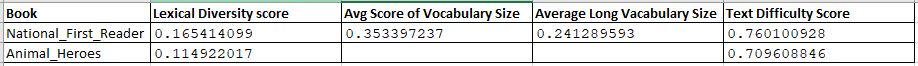

The text difficulty score was calculated by average score for the vocabulary size and also for the long vocabulary size and adding them to the lexical diversity score for each book. 